In [1]:
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
from scipy.special import genlaguerre as L
import time

In [178]:
def prob(n,nbar):
    return 1.0/(nbar+1)*(nbar/(nbar+1))**n    #returns prob of being in state n given nbar

def Omega(n,m,eta2):
    return np.exp(-eta2/2.0) * eta2**(np.abs(m)/2.0) * (math.factorial(n)/math.factorial(n+m))**(np.sign(m)/2.0) \
        * L(n,np.abs(m))(eta2)              #returns unitless rabi rate of transition n -> n+m given Lamb-Dicke Parameter

def carryOmega(n,eta2):
    return np.exp(-eta2/2.0)* L(n,0)(eta2)

def basicFastOmega(n,eta2):
    return 1.0-eta2*n

def fastOmega(n,eta2):
    ncuts = np.array([23, 115, 275, 460, 550, 1000])
    if n <= ncuts[0]:
        return np.exp(-eta2/2.0)*(1.0 - n*eta2 )
    elif ncuts[0]<n<=ncuts[1]:
        return np.exp(-eta2/2.0)*(1.0 - n*eta2 + n*(n-1)/4.0*eta2**2)
    elif ncuts[1]<n<=ncuts[2]:
        return np.exp(-eta2/2.0)*(1.0 - n*eta2 + n*(n-1)/4.0*eta2**2 - n*(n-1)*(n-2)/36.0*eta2**3)
    elif ncuts[2]<n<=ncuts[3]:
        return np.exp(-eta2/2.0)*(1.0 - n*eta2 + n*(n-1)/4.0*eta2**2 - n*(n-1)*(n-2)/36.0*eta2**3 \
            + n*(n-1)*(n-2)*(n-3)/576.0*eta2**4)
    elif ncuts[3]<n<=ncuts[4]:
        return np.exp(-eta2/2.0)*(1.0 - n*eta2 + n*(n-1)/4.0*eta2**2 - n*(n-1)*(n-2)/36.0*eta2**3 \
            + n*(n-1)*(n-2)*(n-3)/576.0*eta2**4 - n*(n-1)*(n-2)*(n-3)*(n-4)/14400.0*eta2**5)
    elif ncuts[4]<n<=ncuts[5]:
        return np.exp(-eta2/2.0)*(1.0 - n*eta2 + n*(n-1)/4.0*eta2**2 - n*(n-1)*(n-2)/36.0*eta2**3 \
            + n*(n-1)*(n-2)*(n-3)/576.0*eta2**4 - n*(n-1)*(n-2)*(n-3)*(n-4)/14400.0*eta2**5 \
            + n*(n-1)*(n-2)*(n-3)*(n-4)*(n-5)/518400.0*eta2**6)
    else: return 0.0

In [182]:
Ncut = 999
omegas = np.zeros(Ncut)
fastOmegas = np.zeros(Ncut)
basicFastOmegas = np.zeros(Ncut)
eta2 = 0.05**2
start = time.time()
for n in range(Ncut):
    omegas[n] = carryOmega(n, eta2)
    #fastOmegas[n] =fastOmega(n,eta)
end = time.time()
print(end-start)

start = time.time()
for n in range(Ncut):
    #omegas[n] = Omega(n, 0 ,eta)
    basicFastOmegas[n] = basicFastOmega(n,eta2)
end = time.time()
print(end-start)

start = time.time()
for n in range(Ncut):
    #omegas[n] = Omega(n, 0 ,eta)
    fastOmegas[n] = fastOmega(n,eta2)
end = time.time()
print(end-start)

11.142390012741089
0.0
0.0045583248138427734


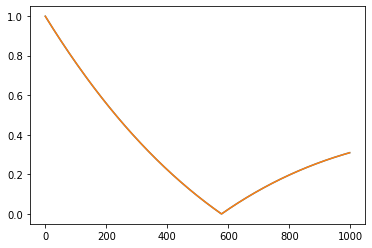

In [183]:
ns = np.linspace(0,Ncut-1,Ncut)
plt.plot(ns, np.abs(omegas))
#plt.plot(ns, np.abs(basicFastOmegas))
plt.plot(ns, np.abs(fastOmegas))

(-0.1, 0.1)

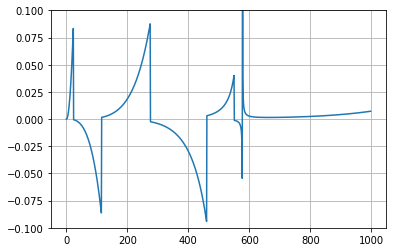

In [184]:
#plt.plot(ns[:301], 100*(np.abs(omegas[:301])-np.abs(fastOmegas[:301]))/np.abs(omegas[:301]))
plt.plot(ns, 100*(np.abs(omegas)-np.abs(fastOmegas))/np.abs(omegas))
plt.grid()
plt.ylim([-0.1,0.1])

In [171]:
math.factorial(6)**2

518400